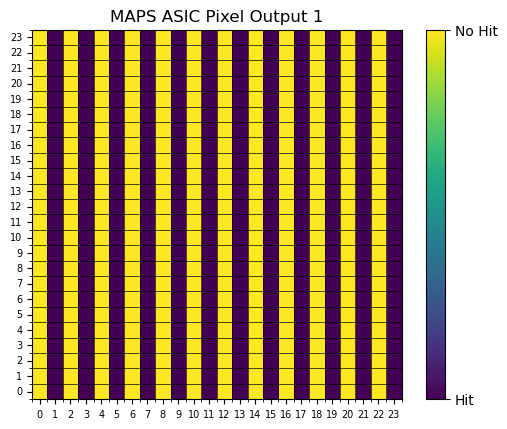

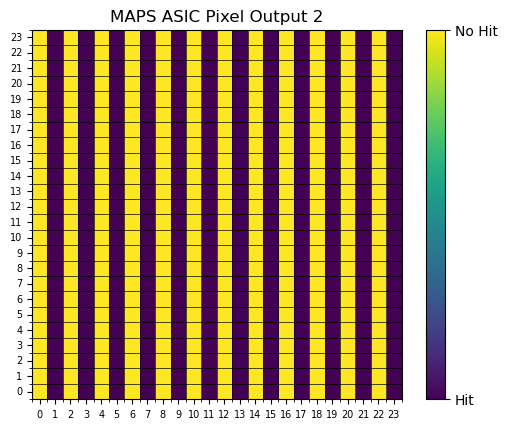

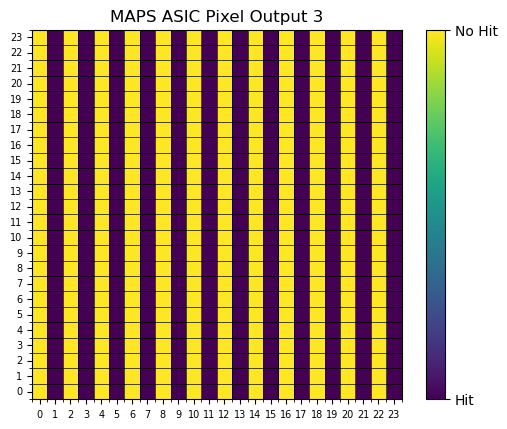

In [37]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

readFilename = 'pixOut.txt'
current_directory = os.getcwd()
previous_directory = os.path.abspath(os.path.join(current_directory,'..'))
file_path_in_previous_directory = os.path.join(previous_directory, readFilename)
writeFilename = 'pixString.txt'
current_directory = os.getcwd()
previous_directory = os.path.abspath(os.path.join(current_directory,'..'))
file_path_in_previous_directory = os.path.join(previous_directory, writeFilename)

numberFrames = 3

def removeLinebreak(read, write):
    with open(read.strip('"'), 'r') as pixOut:
        pixContents = pixOut.read()
    pixString = pixContents.replace('\n', '')
    with open(write.strip('"'), 'w') as pixOut:
        pixOut.write(pixString)
    return pixString

def makeFrames(string, num_frames):
    frame_size = len(string) // num_frames
    frames = [string[i:i + frame_size] for i in range(0, len(string), frame_size)]
    return frames

def strToArray(frame_string, dimension):
    numbers_list = [int(num) for num in frame_string]
    n_array = np.array(numbers_list).reshape(dimension, dimension)
    return n_array

pixString = removeLinebreak(readFilename, writeFilename)
pixFrames = makeFrames(pixString, numberFrames)

array_list = []

for frame in pixFrames:
    pixArray = strToArray(frame, 24)
    array_list.append(pixArray)

for i in range(numberFrames):
    plt.figure()
    color_map = plt.cm.viridis
    plt.imshow(array_list[i], cmap=color_map, extent=[0, 24, 0, 24])

    plt.title(f"MAPS ASIC Pixel Output {i+1}")

    x_locator = ticker.MultipleLocator(base=1.0)
    y_locator = ticker.MultipleLocator(base=1.0)

    x_formatter = ticker.ScalarFormatter(useOffset=False)
    y_formatter = ticker.ScalarFormatter(useOffset=False)

    ax = plt.gca()
    ax.xaxis.set_major_locator(x_locator)
    ax.yaxis.set_major_locator(y_locator)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.yaxis.set_major_formatter(y_formatter)

    ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.5))

    plt.grid(which='minor', linestyle='-', linewidth=0.5, color='black')
    plt.grid(which='major', linestyle='-', linewidth=0, color='black')

    column_labels = [str(j) for j in range(24)]
    row_labels = [str(j) for j in range(24)]

    ax.set_xticks(np.arange(24) + 0.5, minor=False)
    ax.set_yticks(np.arange(24) + 0.5, minor=False)
    ax.set_xticklabels(column_labels, fontsize=7, ha='center')
    ax.set_yticklabels(row_labels, fontsize=7, va='center')

    cbar = plt.colorbar(ticks=[0, 1])
    cbar.set_ticklabels(['Hit', 'No Hit'])

    plt.show()


In [ ]:
#be able to read 1000 frames, % hits per frame (average), % histogram per frame, % per frame chronologically, pixel by pixel hit frequency, hit frequency in 3d, pseudorandom generate 1000 frames,

C:\Users\ahmcg\MAPS_ASIC_Behavioral\Software
